In [1]:
# calculate galactic flux in LuSEE-N band 
# according to Zaslavsky and Eastwood STEREO papers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import astropy.units as u
import astropy.constants as const

def B_NB(f):
    ''' return sky brightness (W/m**2/Hz/sr) at frequency f (MHz) 
        according to the model of Novaco and Brown 1978 ApJ 221 (1978): 114-123
	'''
    B0 = 1.36e-19
    plB = -0.76
    pltau = -0.64
    tau = 3.28 * f**pltau
    return B0 * f**plB * np.exp(-1.*tau)

def B_C(f):
    ''' return sky brightness (W/m**2/Hz/sr) at frequency f(MHz) 
        according to the model of Cane 1979 MNRAS 189.3 (1979): 465-478.
	'''
    Ig = 2.48e-20
    Ieg = 1.06e-20
    plg = -0.52
    pleg = -0.8
    pltau = -2.1
    tau = 5 * f**pltau
    return Ig * f**plg * (1 - np.exp(-1.*tau))/tau + Ieg * f**pleg * np.exp(-1.0 * tau)

def T2B(T, f):
    ''' return brightness temperature in W/m*2/Hz/sr from T in K and f in MHz) '''
    B = 2 * const.k_B * T*u.K * (f * u.MHz)**2 / (const.c)**2
    return B.to(u.W / u.m / u.m / u.Hz)

def B2T(B, f):
    ''' return brightness temperature in K from brightness in W/m*2/Hz/sr and f in MHz '''
    B_units = u.W / u.m / u.m / u.Hz
    T = B * B_units * (const.c)**2 / 2 / const.k_B / (f * u.MHz)**2
    return T.to(u.K)

def B2V(B, f, leff, gamma):
    ''' return V^2/Hz for dipole of effective length leff [m] and preamp coupling efficiency gamma c.f. Zaslavsky (11) '''
    return 4*np.pi / 3. * 377 * B * (leff*gamma)**2

In [2]:
# get max flux density and frequency for the 2 models
f=np.linspace(1,100,1000)
BNB=B_NB(f)
fmax_BNB=f[np.argmax(BNB)]
BC=B_C(f)
fmax_C=f[np.argmax(BC)]
print(BNB.max(), BC.max())
print(fmax_BNB, fmax_C)

1.2411900978506889e-20 1.3709826004867284e-20
4.864864864864865 3.081081081081081


In [3]:
# get flux density at edges of band
print(B_NB(1), B_NB(50))
print(B_C(1), B_C(50))

5.117442925775966e-21 5.318926693175571e-21
4.998002021074842e-21 3.7040678463336234e-21


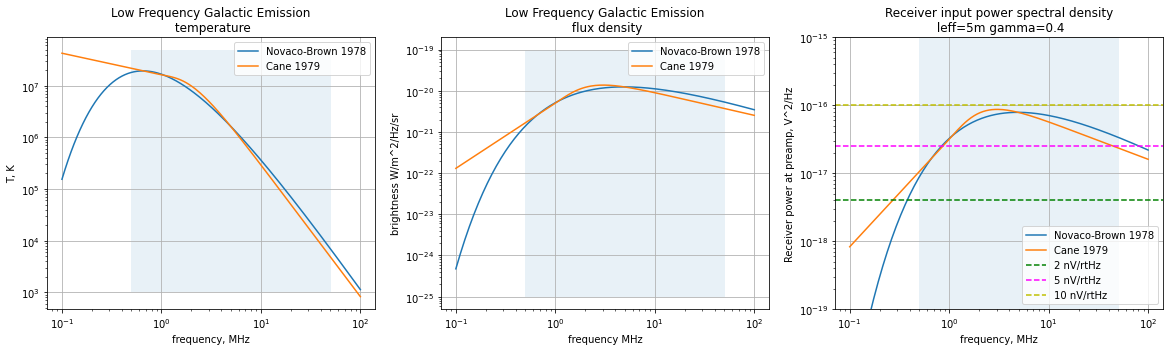

In [4]:
plt.figure(figsize=(20,5))

# first subplot: galactic background spectra (Kelvin) for 2 models
plt.subplot(1,3,1)
f = np.logspace(-1,2,200)
plt.plot(f,B2T(B_NB(f),f), label='Novaco-Brown 1978')
plt.plot(f,B2T(B_C(f),f), label='Cane 1979')
rect = mpatches.Rectangle((.5,1000),50, 50e6, fill='g', alpha=.1)
plt.gca().add_patch(rect)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('frequency, MHz')
plt.ylabel('T, K')
_=plt.title("Low Frequency Galactic Emission\n temperature")

# second subplot: spectra (W/m^2/Hz/sr)
plt.subplot(1,3,2)
plt.loglog(f, B_NB(f), label='Novaco-Brown 1978')
plt.loglog(f, B_C(f), label='Cane 1979')
rect = mpatches.Rectangle((.5,1e-25),50, 1e-19, fill='g', alpha=.1)
plt.gca().add_patch(rect)
plt.grid()
plt.legend()
plt.xlabel('frequency MHz')
plt.title("Low Frequency Galactic Emission\n flux density")
_=plt.ylabel('brightness W/m^2/Hz/sr')

# third subplot: spectrum of receiver power (V^2/Hz) assuming a dipole antenna with 
# leff effective length (m) coupling to high-impedance receiver with 40% efficiency (ala PSP RFS)
# superimposed lines of receiver noise spectral density for 2, 5, 10 nV/rtHz
plt.subplot(1,3,3)
plt.plot(f, B2V(B_NB(f), f, 5, .4), label='Novaco-Brown 1978')
plt.plot(f, B2V(B_C(f), f, 5, .4), label='Cane 1979')
rect = mpatches.Rectangle((.5,1e-20),50, 1e-15, fill='g', alpha=.1)
plt.gca().add_patch(rect)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-19,1e-15)
plt.grid()
plt.xlabel('frequency, MHz')
plt.ylabel('Receiver power at preamp, V^2/Hz')
plt.axhline((2*1e-9)**2, c='g', ls='dashed', label='2 nV/rtHz')
plt.axhline((5*1e-9)**2, c='magenta', ls='dashed', label='5 nV/rtHz')
plt.axhline((10*1e-9)**2, c='y', ls='dashed', label='10 nV/rtHz')
plt.title('Receiver input power spectral density\n leff=5m gamma=0.4')
_=plt.legend()

In [5]:
B_NB(10e6)

6.508662304824599e-25

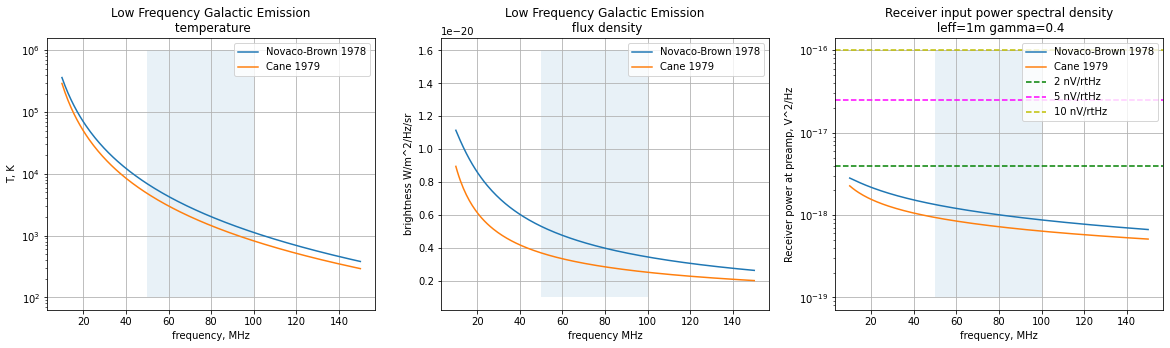

In [6]:
# repeat for 50-100MHz observing with short dipole leff=1m
plt.figure(figsize=(20,5))

# first subplot: galactic background spectra (Kelvin) for 2 models
plt.subplot(1,3,1)
f = np.linspace(10,150,200)
plt.plot(f,B2T(B_NB(f),f), label='Novaco-Brown 1978')
plt.plot(f,B2T(B_C(f),f), label='Cane 1979')
rect = mpatches.Rectangle((50,100),50, 1e6, fill='g', alpha=.1)
plt.gca().add_patch(rect)
# plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('frequency, MHz')
plt.ylabel('T, K')
_=plt.title("Low Frequency Galactic Emission\n temperature")

# second subplot: spectra (W/m^2/Hz/sr)
plt.subplot(1,3,2)
plt.plot(f, B_NB(f), label='Novaco-Brown 1978')
plt.plot(f, B_C(f), label='Cane 1979')
rect = mpatches.Rectangle((50,1e-21),50, .15e-19, fill='g', alpha=.1)
plt.gca().add_patch(rect)
plt.grid()
plt.legend()
plt.xlabel('frequency MHz')
plt.title("Low Frequency Galactic Emission\n flux density")
_=plt.ylabel('brightness W/m^2/Hz/sr')

# third subplot: spectrum of receiver power (V^2/Hz) assuming a dipole antenna with 
# leff effective length (m) coupling to high-impedance receiver with 40% efficiency (ala PSP RFS)
# superimposed lines of receiver noise spectral density for 2, 5, 10 nV/rtHz
plt.subplot(1,3,3)
plt.plot(f, B2V(B_NB(f), f, 1, .4), label='Novaco-Brown 1978')
plt.plot(f, B2V(B_C(f), f, 1, .4), label='Cane 1979')
rect = mpatches.Rectangle((50,1e-19),50, 1e-16, fill='g', alpha=.1)
plt.gca().add_patch(rect)
# plt.xscale('log')
plt.yscale('log')
# plt.ylim(1e-19,1e-15)
plt.grid()
plt.xlabel('frequency, MHz')
plt.ylabel('Receiver power at preamp, V^2/Hz')
plt.axhline((2*1e-9)**2, c='g', ls='dashed', label='2 nV/rtHz')
plt.axhline((5*1e-9)**2, c='magenta', ls='dashed', label='5 nV/rtHz')
plt.axhline((10*1e-9)**2, c='y', ls='dashed', label='10 nV/rtHz')
plt.title('Receiver input power spectral density\n leff=1m gamma=0.4')
_=plt.legend(loc='upper right')

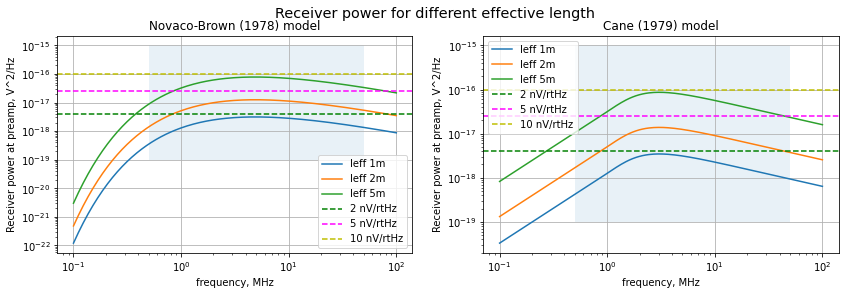

In [7]:
# show effect of changing effective length
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
f = np.logspace(-1,2,200)
for leff in [1,2,5]:
    plt.plot(f, B2V(B_NB(f), f, leff, .4), label='leff ' + str(leff)+ 'm')
rect = mpatches.Rectangle((.5,1e-19),50, 1e-15, fill='g', alpha=.1)
plt.gca().add_patch(rect)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel('frequency, MHz')
plt.ylabel('Receiver power at preamp, V^2/Hz')
plt.axhline((2*1e-9)**2, c='g', ls='dashed', label='2 nV/rtHz')
plt.axhline((5*1e-9)**2, c='magenta', ls='dashed', label='5 nV/rtHz')
plt.axhline((10*1e-9)**2, c='y', ls='dashed', label='10 nV/rtHz')
plt.legend()
plt.title('Novaco-Brown (1978) model')

plt.subplot(1,2,2)
f = np.logspace(-1,2,200)
for leff in [1,2,5]:
    plt.plot(f, B2V(B_C(f), f, leff, .4), label='leff ' + str(leff)+ 'm')
rect = mpatches.Rectangle((.5,1e-19),50, 1e-15, fill='g', alpha=.1)
plt.gca().add_patch(rect)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel('frequency, MHz')
plt.ylabel('Receiver power at preamp, V^2/Hz')
plt.axhline((2*1e-9)**2, c='g', ls='dashed', label='2 nV/rtHz')
plt.axhline((5*1e-9)**2, c='magenta', ls='dashed', label='5 nV/rtHz')
plt.axhline((10*1e-9)**2, c='y', ls='dashed', label='10 nV/rtHz')
plt.legend()
_=plt.title('Cane (1979) model')
_=plt.suptitle('Receiver power for different effective length', fontsize='x-large')

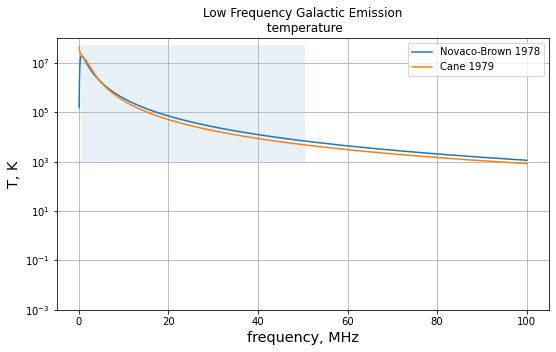

In [8]:
plt.figure(figsize=(30,5))

# first subplot: galactic background spectra (Kelvin) for 2 models
plt.subplot(1,3,1)
f = np.logspace(-1,2,200)
plt.plot(f,B2T(B_NB(f),f), label='Novaco-Brown 1978')
plt.plot(f,B2T(B_C(f),f), label='Cane 1979')
rect = mpatches.Rectangle((.5,1000),50, 50e6, fill='g', alpha=.1)
plt.gca().add_patch(rect)
# plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3,1e8)
plt.grid()
plt.legend()
plt.xlabel('frequency, MHz', fontsize='x-large')
plt.ylabel('T, K', fontsize='x-large')

_=plt.title("Low Frequency Galactic Emission\n temperature")
plt.savefig('LF_Galactic_linear.png')